ID #1: 208937334

# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: *** 208937334 ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x19bab04deb0>, <__main__.Node at 0x19bae0a5970>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

In [5]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [6]:
data.isna().values.any()

False

We will split the dataset to `Training` and `Testing` datasets.

In [7]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [8]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    target = data[:,-1]
    temp = []
    
    for i in np.unique(target):
        class_i = ((target == i).sum() / len(target)) **2
        temp.append(class_i)
    
    #gini
    gini = 1 - sum(temp)
    
    return gini

In [9]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    target = data[:,-1]
    temp = []
    
    for i in np.unique(target):
        prob_class_i = ((target == i).sum() / len(target))
        temp.append(prob_class_i * np.log2(prob_class_i))
    
    entropy = - sum(temp)
    
    return entropy

In [10]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [11]:
def goodness_of_split(data, feature, impurity_func,gain_ratio = False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.

    Returns the goodness of split.  
    """
    # parent impurity
    parent_imp = impurity_func(data)
    
    # unique values in each features
    features_values = set(data[:,feature])
    
    weighted_imps = []
    
    num_items_bfre_split = len(data)
    
    for val in features_values:
        data_val = data[data[:,feature] == val]  
        imp = impurity_func(data_val)
        insnces_in_split = len(data_val)
        
        weighted_imps.append((insnces_in_split/num_items_bfre_split)*imp)
        
    goodness = parent_imp - sum(weighted_imps)
    
    if gain_ratio == True and impurity_func == calc_entropy:
        feat = data[:,feature]
        temp = []

        for i in np.unique(feat):
            prob_class_i = ((feat == i).sum() / len(feat))
            temp.append(prob_class_i * np.log2(prob_class_i))

        inner_entropy = - sum(temp)
        return goodness/inner_entropy
        
    else:
        return goodness    
    
        
        

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [12]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    def __init__(self, feature, value, data):
        self.feature = feature # column index of criteria being tested
        self.feature_led_to_split = -1 # the feature led to split
        self.value = value # the value of the feature led to split
        self.data = data # the instances in this node
        self.pred = None # prediction of node 
        self.counter = None 
        self.state = "Node" # node/leaf
        self.children = []
        
    def add_child(self, node):
        self.children.append(node)
        
        
    def get_number_of_instances(self):
        if self.data.ndim == 2:
            return self.data.shape[0]
        
        if self.data.ndim == 1:
            return 1
        
    def is_leaf(self):
        if len(np.unique(self.data[:,-1])) == 1:
            self.state = "Leaf"
            return True
        else:
            return False
        
    def prediction(self):
        unique_values, counts = np.unique(self.data[:,-1], return_counts=True)
        most_common_value = unique_values[np.argmax(counts)]
        self.pred = most_common_value
        self.counter = {k: v for k, v in zip(unique_values, counts)}
        
    

In [13]:
def build_tree(data, impurity, min_samples_split=1, max_depth=1000, gain_ratio=False):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - min_samples_split: the minimum number of samples required to split an internal node
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """
    # create 
    root = DecisionNode('','ROOT',data)
    root.prediction()
    
    # check if node should be leaf
    if root.is_leaf() or max_depth==0 or root.get_number_of_instances() <= min_samples_split:
        root.state = 'Leaf'
        return root
    

    # calc info gain for each feature
    info_gains = np.array([goodness_of_split(data,i,impurity,gain_ratio) for i in range(data.shape[1]-1)])

    # select the feature with the highest IG
    best_feature = np.argmax(info_gains)

    # get best feature's values
    features_values = set(data[:,best_feature])

    # update feature
    root.feature = best_feature

    # splitting based on the values
    for val in features_values:
        # subset of the data
        data_val = data[data[:,best_feature] == val] 
        
        # creating the child - "new tree"
        child_node = build_tree(data_val, impurity, min_samples_split, max_depth-1)
        
        # assign values
        child_node.value = val  
        child_node.feature_led_to_split = best_feature
        root.add_child(child_node)
    
        
    return root


In [14]:
# # python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [15]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    
    # stop critiria if we found leaf return its prediction
    if node.state == 'Leaf':
        return(node.pred)
    
    # found the child with the match value and predict on him until finding leaf
    for child in node.children:
        if instance[node.feature] == child.value:
            return predict(child,instance)
    
    # in case of nan or unseen value
    return node.pred

In [16]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    true_predictions = 0
    for instance in dataset:
        if predict(node,instance) == instance[-1]:
            true_predictions += 1
            
    accuracy = true_predictions/ dataset.shape[0]
    
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [17]:
accuracy_gini_test = calc_accuracy(tree_gini, X_test)
accuracy_entropy_test = calc_accuracy(tree_entropy, X_test)
accuracy_entropy_gain_ratio_test = calc_accuracy(tree_entropy_gain_ratio, X_test)

accuracy_gini_train = calc_accuracy(tree_gini, X_train)
accuracy_entropy_train = calc_accuracy(tree_entropy, X_train)
accuracy_entropy_gain_ratio_train = calc_accuracy(tree_entropy_gain_ratio, X_train)

data = {
    'Gini': [accuracy_gini_train, accuracy_gini_test],
    'Entropy': [accuracy_entropy_train, accuracy_entropy_test],
    'Entropy Gain Ratio': [accuracy_entropy_gain_ratio_train, accuracy_entropy_gain_ratio_test]
}

df = pd.DataFrame(data, index=['Train', 'Test'])
display(df)

,Gini,Entropy,Entropy Gain Ratio
Train,0.993763,0.994748,0.994748
Test,0.774495,0.772526,0.772526


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

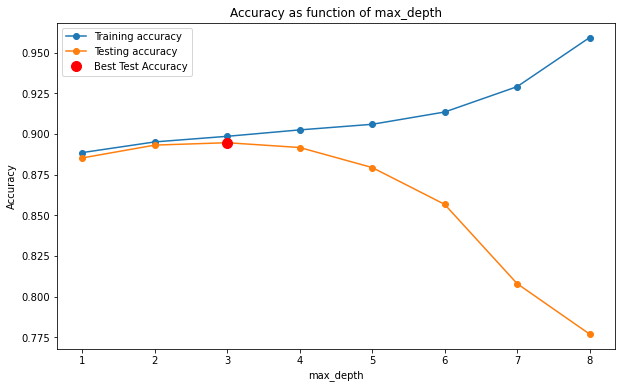

In [18]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8]
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    tree = build_tree(X_train,calc_entropy,max_depth=depth)
    train_accuracies.append(calc_accuracy(tree,X_train))
    test_accuracies.append(calc_accuracy(tree,X_test))


plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', label='Training accuracy')
plt.plot(max_depths, test_accuracies, marker='o', label='Testing accuracy')

# Get the best accuracy and its corresponding max_depth
best_accuracy_index = np.argmax(test_accuracies)
best_accuracy = test_accuracies[best_accuracy_index]
best_depth = max_depths[best_accuracy_index]

# Highlight the best result
plt.plot(best_depth, best_accuracy, marker='o', markersize=10, label='Best Test Accuracy', color='red', linestyle="None")

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy as function of max_depth')
plt.show()

## Min Samples Split

(15 points)

Consider the following min_samples_split values: [1, 5, 10, 20, 50]. For each value, construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the min_samples_split. Mark the best result on the graph with red circle. (make sure that the x-axis ticks represent the values of min_samples_split)

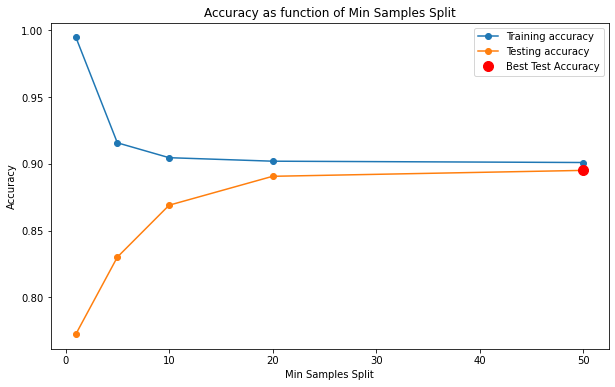

In [19]:
min_splits = [1, 5, 10, 20, 50]
train_accuracies = []
test_accuracies = []

for min_split in min_splits:
    tree = build_tree(X_train, calc_entropy, min_samples_split= min_split)
    train_accuracies.append(calc_accuracy(tree,X_train))
    test_accuracies.append(calc_accuracy(tree,X_test))


plt.figure(figsize=(10, 6))
plt.plot(min_splits, train_accuracies, marker='o', label='Training accuracy')
plt.plot(min_splits, test_accuracies, marker='o', label='Testing accuracy')

# Get the best accuracy and its corresponding max_depth
best_accuracy_index = np.argmax(test_accuracies)
best_accuracy = test_accuracies[best_accuracy_index]
best_min_split = min_splits[best_accuracy_index]

# Highlight the best result
plt.plot(best_min_split, best_accuracy, marker='o', markersize=10, label='Best Test Accuracy', color='red', linestyle="None")

plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy as function of Min Samples Split')
plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_min_samples_split - the best tree according to min_samples_split pruning

In [20]:
tree_max_depth = build_tree(X_train, calc_entropy, max_depth= 3)
tree_min_samples_split = build_tree(X_train, calc_entropy, min_samples_split= 50)

## Number of Nodes

(5 points)

Complete the function counts_nodes and print the number of nodes in each tree and print the number of nodes of the two trees above

In [21]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    if len(node.children) == 0:
        return 1 
    
    counter = 0
    for c in node.children:
        counter+= count_nodes(c)
    
    # counter of childern + root
    return counter + 1
    

In [22]:
print("tree_max_depth ---",count_nodes(tree_max_depth))
print('tree_min_samples_split---',count_nodes(tree_min_samples_split))

tree_max_depth --- 146
tree_min_samples_split--- 328


## Print the tree

Complete the function `print_tree`. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [23]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    if depth == 0:
        print('[{}, feature=X{}]'.format(feature_val,node.feature))
        
    for c in node.children:
        if c.state=='Leaf':
            print((depth+1)* ' ',
                  '[X{feature_led_to}={val}, leaf]: [{counter}]'.format(feature_led_to= c.feature_led_to_split,
                                                                        val = c.value,
                                                                        counter = c.counter))
        else:
            print((depth+1)* ' ',
                  '[X{feature_led_to}={val}, feature=X{feature}]'.format(feature_led_to= c.feature_led_to_split,
                                                                         val = c.value,
                                                                         feature = c.feature))

        print_tree(c,depth+1)
        

print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)

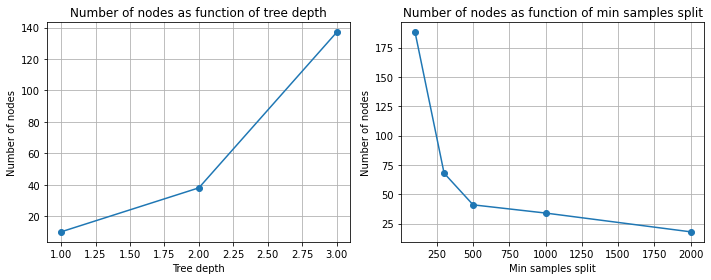

In [24]:
# first find what trees have less than 50 nodes

import matplotlib.pyplot as plt

# List of depths and min_splits to test
depths = [1, 2, 3]
min_splits = [100, 300, 500, 1000,2000]

# Lists to hold the number of nodes for each parameter
num_nodes_depth = []
num_nodes_min_splits = []

# For each depth and min_split, build a tree and count the number of nodes
for depth in depths:
    tree = build_tree(X_train, impurity=calc_gini, max_depth=depth)
    nodes = count_nodes(tree)
    num_nodes_depth.append(nodes)

for min_split in min_splits:
    tree = build_tree(X_train, impurity=calc_gini, min_samples_split=min_split)
    nodes = count_nodes(tree)
    num_nodes_min_splits.append(nodes)

# Now, plot the number of nodes as a function of the tree depth and min_samples_split
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot for max_depth
axs[0].plot(depths, num_nodes_depth, marker='o', linestyle='-')
axs[0].set_xlabel('Tree depth')
axs[0].set_ylabel('Number of nodes')
axs[0].set_title('Number of nodes as function of tree depth')
axs[0].grid(True)

# Plot for min_samples_split
axs[1].plot(min_splits, num_nodes_min_splits, marker='o', linestyle='-')
axs[1].set_xlabel('Min samples split')
axs[1].set_ylabel('Number of nodes')
axs[1].set_title('Number of nodes as function of min samples split')
axs[1].grid(True)

plt.tight_layout()
plt.show()





In [25]:
# List of depths and min_splits to test
depths = [1, 2]
min_splits = [500, 1000, 2000]


best_accuracy = 0

# For each depth, build a tree and calculate accuracy
for depth in depths:
    tree = build_tree(X_train, impurity=calc_gini, max_depth=depth)
    accuracy = calc_accuracy(tree, X_test)
    

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_parameters = {'depth': depth}
        best_tree_less50 = tree


for min_split in min_splits:
    tree = build_tree(X_train, impurity=calc_gini, min_samples_split=min_split)
    accuracy = calc_accuracy(tree, X_test)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_parameters = {'min_split': min_split}
        best_tree_less50 = tree


In [26]:
best_parameters

{'depth': 2}

In [27]:
print_tree(best_tree_less50)

[ROOT, feature=X4]
  [X4=y, feature=X1]
   [X1=y, leaf]: [{'e': 31, 'p': 188}]
   [X1=s, leaf]: [{'e': 18, 'p': 194}]
  [X4=n, feature=X18]
   [X18=y, leaf]: [{'e': 35, 'p': 3}]
   [X18=h, leaf]: [{'e': 35, 'p': 5}]
   [X18=n, leaf]: [{'e': 916, 'p': 110}]
   [X18=r, leaf]: [{'e': 6, 'p': 46}]
   [X18=o, leaf]: [{'e': 28, 'p': 4}]
   [X18=w, leaf]: [{'e': 403, 'p': 78}]
   [X18=k, leaf]: [{'e': 875, 'p': 96}]
   [X18=b, leaf]: [{'e': 34, 'p': 2}]
  [X4=s, feature=X13]
   [X13=p, leaf]: [{'e': 12, 'p': 190}]
   [X13=w, leaf]: [{'e': 26, 'p': 190}]
  [X4=f, feature=X10]
   [X10=f, leaf]: [{'e': 14, 'p': 91}]
   [X10=k, leaf]: [{'e': 134, 'p': 1037}]
   [X10=s, leaf]: [{'e': 22, 'p': 310}]
  [X4=c, feature=X6]
   [X6=c, leaf]: [{'e': 7, 'p': 63}]
   [X6=w, leaf]: [{'e': 3, 'p': 74}]
  [X4=l, feature=X1]
   [X1=y, leaf]: [{'e': 159, 'p': 10}]
   [X1=s, leaf]: [{'e': 94, 'p': 16}]
   [X1=f, leaf]: [{'e': 19, 'p': 1}]
  [X4=p, feature=X0]
   [X0=f, leaf]: [{'e': 7, 'p': 86}]
   [X0=x, leaf]: